# Create a classifier for mnist dataset

In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [2]:
from torchvision import datasets, transforms
mnist = datasets.MNIST(root='.', train=True, download=True)

In [3]:
print("Number of training examples", mnist.train_data.shape)
print("Image information", mnist[0])

Number of training examples torch.Size([60000, 28, 28])
Image information (<PIL.Image.Image image mode=L size=28x28 at 0x11B6B1B38>, tensor(5))


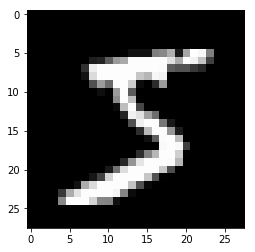

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(mnist[0][0])

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        self.fully = nn.Sequential(
            nn.Linear(28*28, 10)
        )
        
    def forward(self, x):
        x = x.view([-1,28*28])
        x = self.fully(x)
        x = F.log_softmax(x, dim=1)
        return x

In [6]:
train_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=True,transform=transforms.Compose([transforms.ToTensor()])), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(datasets.MNIST(root='.',train=False,transform=transforms.Compose([transforms.ToTensor()])), batch_size=1, shuffle=True)

In [7]:
def train():
    learning_rate = 1e-3
    num_epochs = 3
    
    net = Net()
    optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
    
    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            output = net(data)

            loss = F.nll_loss(output, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            if batch_idx % 100 == 0:
                print('Epoch = %f. Batch = %s. Loss = %s' % (epoch, batch_idx, loss.item()))  
                
    return net

In [8]:
net = train()

Epoch = 0.000000. Batch = 0. Loss = 2.303990364074707
Epoch = 0.000000. Batch = 100. Loss = 0.944770097732544
Epoch = 0.000000. Batch = 200. Loss = 0.6024922132492065
Epoch = 0.000000. Batch = 300. Loss = 0.37279099225997925
Epoch = 0.000000. Batch = 400. Loss = 0.4637526273727417
Epoch = 0.000000. Batch = 500. Loss = 0.30020996928215027
Epoch = 0.000000. Batch = 600. Loss = 0.46635979413986206
Epoch = 0.000000. Batch = 700. Loss = 0.28683096170425415
Epoch = 0.000000. Batch = 800. Loss = 0.34193897247314453
Epoch = 0.000000. Batch = 900. Loss = 0.2998521625995636
Epoch = 1.000000. Batch = 0. Loss = 0.3675362169742584
Epoch = 1.000000. Batch = 100. Loss = 0.3356616795063019
Epoch = 1.000000. Batch = 200. Loss = 0.46262598037719727
Epoch = 1.000000. Batch = 300. Loss = 0.45991790294647217
Epoch = 1.000000. Batch = 400. Loss = 0.41947293281555176
Epoch = 1.000000. Batch = 500. Loss = 0.44147467613220215
Epoch = 1.000000. Batch = 600. Loss = 0.32572752237319946
Epoch = 1.000000. Batch = 7

In [9]:
net.eval()
test_loss = 0
correct = 0
total = 0

for data, target in test_loader:
    total += len(target)
    output = net(data)
    pred = output.max(1, keepdim=True)[1]
    correct += target.eq(pred.view_as(target)).sum()
    
print("Correct out of %s" % total, correct.item())
print("Percentage accuracy", correct.item()*100/10000.)

Correct out of 10000 9229
Percentage accuracy 92.29
